# Advance Statistics for Physics Analysis - Final Project

__Group Members:__<br>
__Qiqi Zhang__ 
__2072838__<br>
__Poornima	Mudiyanselage__ 
__2088370__<br>

#  Naive Bayes classifier for Fake News recognition

Fake news are defined by the New York Times as "a made-up story with an intention to deceive", with the intent to confuse or deceive people. They are everywhere in our daily life, and come especially from social media platforms and applications in the online world. Being able to distinguish fake contents form real news is today one of the most serious challenges facing the news industry. <br>

### Multinomial Naive Bayes

Multinomial Naive Bayes is a machine learning algorithm commonly used for text classification, assuming that text features, like word frequencies, are discrete and that features are conditionally independent given the class label. It calculates the probability of a document belonging to a particular category based on the frequency of words in that document and is widely used in tasks like spam detection and sentiment analysis.

In the context of Multinomial Naive Bayes, we make the assumption that our dataset follows a multinomial distribution:$(p_1, \ ... \ , p_L)$ ,where each word's frequency in a sentence represents a probability.

This means that we treat every sentence with a specific label, such as "label 1," as a collection of words drawn independently from a probability distribution specific to that label over a vocabulary of words.

To utilize this assumption, the first step is to create a vocabulary that includes all unique words appearing at least once in the training dataset after preprocessing. This vocabulary essentially forms a list of words we recognize and can use to understand the content of the text.

We can define the following two propositions as bellow.

- Label_i = the label associated to our sentence is i-th label
- word = we find word w in the sentence

According to Bayes' Theorem : $$(1) \ \ \ P(Lable_i|Sentence) = \frac{P(Sentence|Label_i) \cdot P(Label_i)}{P(Sentence)} $$


Now, let's see some importants words.

**Prior**: The prior probability represents our initial beliefs or knowledge about an event or parameter before we observe any new data. It's often based on existing information, assumptions, or prior experience.

**Likelihood**: The likelihood is a measure of how well the observed data or evidence supports different possible values of the event or parameter. It quantifies the probability of observing the data given a specific value of the event or parameter.

**Posterior**: The posterior probability is  the updated probability distribution of the event or parameter after taking into account both our prior beliefs (prior probability) and the new evidence (likelihood). It combines the prior information and the likelihood to provide a more informed and up-to-date estimate of the event or parameter.

**Evidence** :This refers to the data or observations that are used to update our beliefs about a particular event, parameter, or hypothesis. In the Bayesian framework, we start with prior beliefs or probabilities, and as new evidence becomes available, we use Bayes' theorem to compute the posterior probabilities or beliefs. 

The process of going from the prior to the posterior is accomplished using Bayes' theorem, which mathematically describes how to update our beliefs based on new evidence. The posterior represents our revised or updated understanding of a situation or parameter after considering new information.


The result of these calculations can be expressed in this way:


$$(3) \ \ \ P(Label \ i|Sentence) \   :-  \ \textbf{posterior} \ obtained  \ for \ label \ i $$

where:

<br>

- $$(3.1) \ \ \ P(Label \ i) = \frac{ \ number\ of Label \ i}{ Trainig \ set \ size } \ \ \ \ \   :- \ \textbf{prior} \ for \ label \ i  $$ 

<br>
<br>


- $$(3.2) \ \ \ P(Sentence|Label \ i) = \prod_{j=0}^{N}P(w_{j}|Label \ i) \ \ \ \ \  :- \ \textbf{likelihood} \ for \ label \ i  $$   

<br> 

- $$(3.3) \ \ \ P(Sentence) = \prod_{j=0}^{N}P(w_{j}) \ \ \ \ \   :- \ \textbf{evidence} \ for \ the \ considered \ sentence  $$ 

<br>

Likelihoods are computed for each word $w_{j}$ that is present in the vocabulary , using the training test

$$(3.2.1) \ \ \ P(w_{j}|Label \ i) = \frac{ 1+\# \ w_{j} \ in \ sentences \ with \ label \ i}{\# \ of \ all \ w \ in \ sentences \ with \ label \ i} $$

<br>


This is used to calculate the evidence.
<br>

$$(3.3.1) \ \ \ P(w_{j}) = \frac{ \# \ w_{j} \ in \ training \ set}{\# \ of \ all \ w \ in \ training \ set} $$

<br>
<br>









# Libraries

In [180]:
# import the libraries
library(caret)  # data splitting
library(tokenizers)
library(tidyverse)
library(dplyr)
library(stopwords) # removing stop words
library(SnowballC) # steeming words
library(ggplot2) # plotting
library(data.table)
library(wordcloud)
library(qdapDictionaries)

In this project we implement this technique by using two different datasets, the first dataset is composed of 6 classes and the second one is only 2 classes but with larger number of data.

# Data Import

In [181]:
# import the dataset 1 
train_data_multi_raw <- read.csv('train01.csv', header = TRUE)

# import the dataset 2
train_data_bi_raw <- read.csv('train02.csv', header = TRUE)

In [182]:
cat("train data set")
train_data_multi_raw[(0:2),]
cat("train data set 2")
train_data_bi_raw[(0:2),]

train data set

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"


train data set 2

id
1 0 
2 1 
  title                                                                            
1 House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
2 FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                          
  author         
1 Darrell Lucus  
2 Daniel J. Flynn
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

# Functions

In [183]:
# For reproducibility of data splitting
set.seed(123)

# Tokenize the data set
data_tokenize <- function(data){
    # Convert to lowercase
    lower <- data$Text %>% str_to_lower()
    # Erase punctation symbols
    tokens <- str_split(lower, pattern = "\\W+")
    return(tokens)
}

# Remove the stopwords
remove_stopwords <- function(tokens, stopwords){
    for(i in 1:length(tokens)){
        tokens[[i]] <- setdiff(tokens[[i]], stopwords)
    }
    return(tokens)
}

# function to remove numbers
erase_number <- function(data){
    for (i in 1:(length(data))){
        data[[i]] <- data[[i]] [!grepl('[0-9]', data[[i]] )]
    }
return(data)
}

# normalization function 
Stem_words <- function(data){
    for (i in 1:(length(data))){
        data[[i]] <- wordStem(data[[i]])
    }
return(data)
}

is.word  <- function(x) x %in% GradyAugmented

#given a set of words, erase them from another group
english_checker <- function(data){
    for (a in 1:length(data)){
        data[[a]] <-data[[a]][is.word(data[[a]])]
    }
    return(data)
}

#limit number of tokens
reducer <- function(data, limit){
    for (i in 1:length(data)){
        common <- data[[i]] %in%  feature_selector(data[[i]], limit) 
        data[[i]] <- data[[i]][common]
    }
    return(data)
}

# summarize all tokens of the dataset
summarize_tokens <- function(data){
    #combine all tokens obtained into a sigle list
    total_tokens <- c()
    for (i in 1:length(data)){
        total_tokens <- c(total_tokens, data[[i]])
    }
    return(total_tokens)
}

# calculate the posterior
infere_labels <- function(prior, likelihood, dataset){
    prior_prob <- prior[[2]]
    samples_number <- length(dataset)
    labels_size <- length(prior_prob)
    labels_inferred <- matrix(nrow = samples_number, ncol = labels_size, 0)
    
    for (i in 1:samples_number){
        #convert token in dataset into dataframe
        df_dataset <- data.frame(label_0 = dataset[[i]])
        #inner join with likelihood to take only the words matched
        prob_comb <- merge(x=df_dataset, y=likelihood, by="label_0")
        #erase column with labels
        prob_comb$label_0 <- NULL
        #multiply all rows given in the same column (likelihood)
        probs <- apply(prob_comb, 2, prod)
        #multiply result with prior
        probs_post <- probs*prior_prob
        evidence <- sum(probs_post)
        posterior <- probs_post/evidence
        labels_inferred[i,] <- posterior
    }
    return(labels_inferred)
}

#take the index of the highest probability
predicted_labels <- function(probs){
    samples <- dim(probs)[1]
    labels <- matrix(ncol = 1, nrow =samples)
    for (i in 1:samples){
        labels[i] <- which.max(probs[i,]) - 1
    }
    return(labels)
}

#given the library from the training set, select just the most common
feature_selector <- function(total_tokens, size){
  total_tokens_df <- as.data.table(total_tokens)
  filtered <- total_tokens_df  %>%
  group_by(total_tokens) %>% tally() %>% arrange(desc(n)) %>% slice(1:size) 

  return(filtered$total_tokens)
}

#given a set of words, erase them from another group
filtering_data <- function(train_data, filters){
    for (i in 1:length(train_data)){
        train_data[[i]] <- intersect(train_data[[i]], filters)
    }
    return(train_data)
} 

# Parameters

In [184]:
# Initial Parameters for splitting the dataset to training and validation set
p_train <- 0.8
p_valid <- 0.2

# SECTION A: Six Classes NB Classification

## Data Pre-processing

In [185]:
# Perform tokenization
all_token_multi <- data_tokenize(train_data_multi_raw)
all_token_multi[1:2]

[[1]]
 [1] "says"      "the"       "annies"    "list"      "political" "group"    
 [7] "supports"  "third"     "trimester" "abortions" "on"        "demand"   
[13] ""         

[[2]]
 [1] "when"           "did"            "the"            "decline"       
 [5] "of"             "coal"           "start"          "it"            
 [9] "started"        "when"           "natural"        "gas"           
[13] "took"           "off"            "that"           "started"       
[17] "to"             "begin"          "in"             "president"     
[21] "george"         "w"              "bushs"          "administration"
[25] ""

In [186]:
# Remove stopwords and numbers
stopwords <- scan("Stopwords.txt", what = "character") 
all_token_multi_clean_words <- remove_stopwords(all_token_multi, stopwords)
all_token_multi_clean_number <- erase_number(all_token_multi_clean_words)
all_token_multi_clean_number[1:2]

[[1]]
[1] "annies"    "list"      "political" "group"     "supports"  "third"    
[7] "trimester" "abortions" "demand"   

[[2]]
 [1] "decline"        "coal"           "start"          "started"       
 [5] "natural"        "gas"            "took"           "begin"         
 [9] "president"      "george"         "w"              "bushs"         
[13] "administration"

In [187]:
# Normalize tokens
all_token_mulit_norm <- Stem_words(all_token_multi_clean_number)
all_token_mulit_norm[1:2]

[[1]]
[1] "anni"    "list"    "polit"   "group"   "support" "third"   "trimest"
[8] "abort"   "demand" 

[[2]]
 [1] "declin"    "coal"      "start"     "start"     "natur"     "ga"       
 [7] "took"      "begin"     "presid"    "georg"     "w"         "bush"     
[13] "administr"

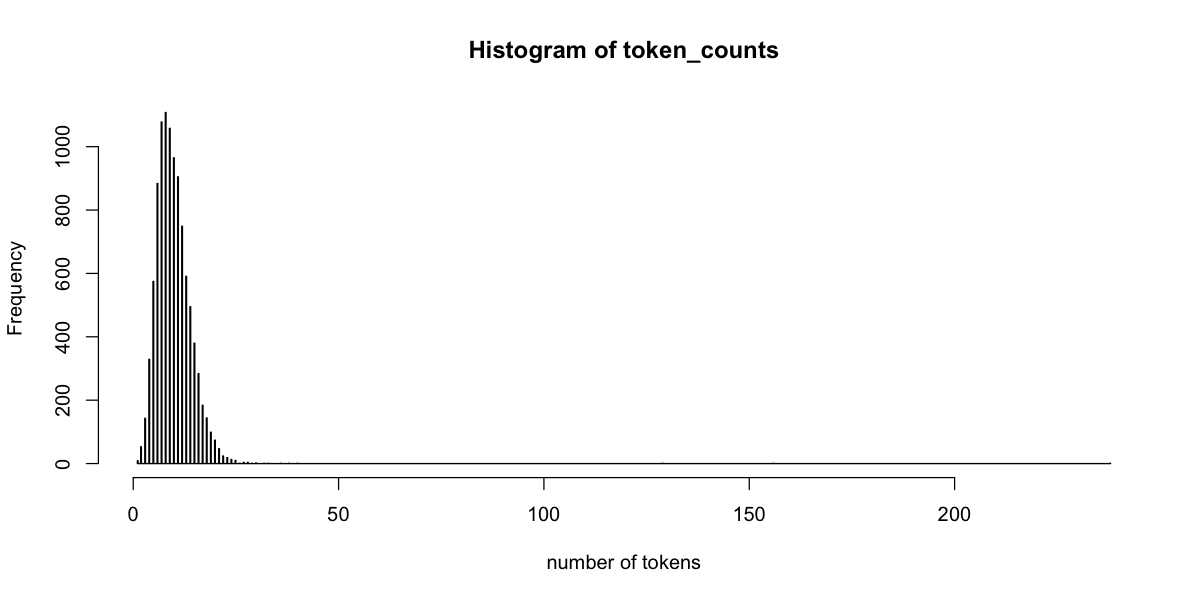

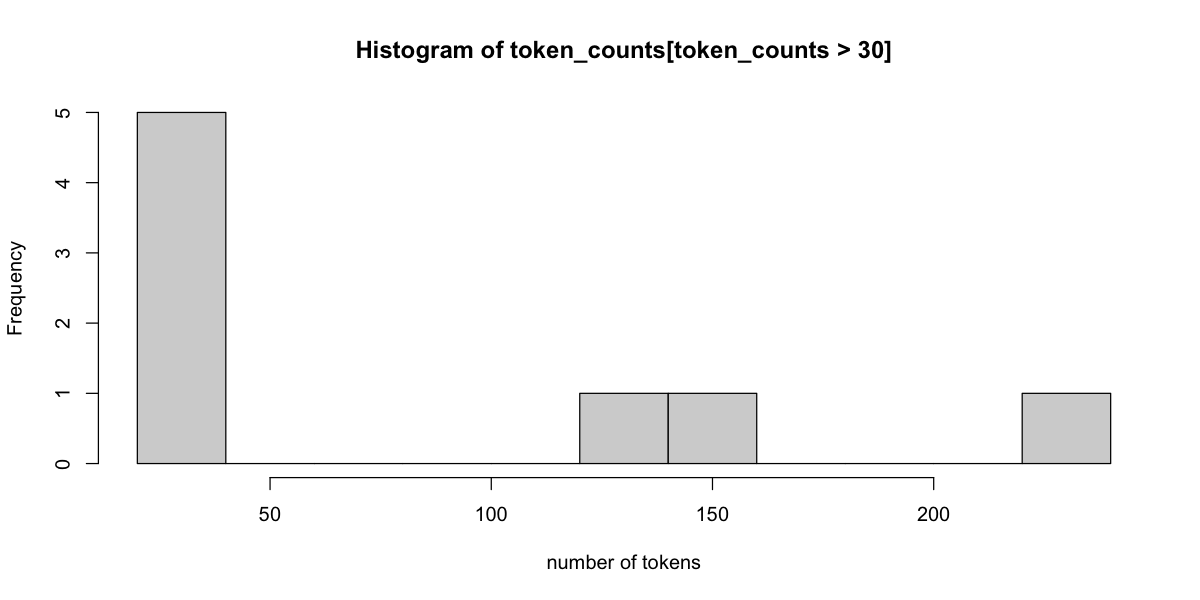

In [188]:
#Count total number of tokens in all samples
token_counts <- c()
tot <- length(all_token_mulit_norm)
for (i in 1:tot){
    token_counts <- c(token_counts, length(all_token_mulit_norm[[i]]))
}

#show histogram
options(repr.plot.width=10, repr.plot.height=5)

#show histogram
hist(token_counts, breaks = 1000, xlab ="number of tokens")
#see text with more than 30 tokens
hist(token_counts[token_counts >30], breaks = 10, xlab ="number of tokens")

In [189]:
# remove samples with more than 30 tokens 
samples_to_remove <- which(token_counts >30)
raw_data_multi_filtered <- train_data_multi_raw[-samples_to_remove,]
raw_data_multi_filtered  <- as.data.frame(raw_data_multi_filtered)

In [190]:
# Data splitting
index <- createDataPartition(raw_data_multi_filtered$Labels, p=p_train, list=FALSE) # % for training set
train_data_multi <- raw_data_multi_filtered[index, ]
validation_data_multi <- raw_data_multi_filtered[-index, ]
cat('The example of training set:\n')
train_data_multi[(0:2),]
#show size 
size_tm <- dim(train_data_multi)
cat("The total number of rows is: ", size_tm[1], " and the total number of colums is: ", size_tm[2], "\n")
cat("\n")
cat('The example of validation set:\n')
validation_data_multi[(0:2),]

#show size
size_vm <-dim(validation_data_multi)
cat("The total number of rows is: ", size_vm[1], " and the total number of colums is: ", size_vm[2], "\n")

The example of training set:


,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"


The total number of rows is:  8188  and the total number of colums is:  3 

The example of validation set:


,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
5,2,The economic turnaround started at the end of my term.,"economy,jobs"
6,5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


The total number of rows is:  2044  and the total number of colums is:  3 


__Prepare training set__

_Compute prior of training set_

In [191]:
#compute prior of the training set (probability that a text has label 0 to 5)
prior_train_multi <- train_data_multi %>% group_by(Labels) %>% 
  summarise(prior=n(),
            .groups = 'drop') %>% arrange(Labels)

prior_train_multi$prior <- prior_train_multi$prior/length(train_data_multi[,1])
cat("Training set priors")
prior_train_multi

Training set priors

Labels,prior
<int>,<dbl>
0,0.16316561
1,0.19296532
2,0.20664387
3,0.19149976
4,0.08255984
5,0.16316561


In [192]:
#Perform tokenization
train_data_token_multi <- data_tokenize(train_data_multi)

#Remove stopwords
train_data_token_filtered_multi <- remove_stopwords(train_data_token_multi, stopwords)

# erase numbers
train_data_token_filtered_multi <- erase_number(train_data_token_filtered_multi)

#Normalize remaining tokens
train_data_token_norm_multi <- Stem_words(train_data_token_filtered_multi)

cat("Here is an example of the process","\n")
cat("Sample text: ")
train_data_multi[1,]
cat("Tokenized text: ", train_data_token_multi[[1]], "\n")
cat("Filtered tokens: ", train_data_token_filtered_multi[[1]], "\n")
cat("Stemmed tokens: ", train_data_token_norm_multi[[1]], "\n")

Here is an example of the process 
Sample text: 

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion


Tokenized text:  says the annies list political group supports third trimester abortions on demand  
Filtered tokens:  annies list political group supports third trimester abortions demand 
Stemmed tokens:  anni list polit group support third trimest abort demand 


_Show constructed library_

The total number of tokens for the training set is:  81027 
The total number of unique tokens for the training set is:  7013

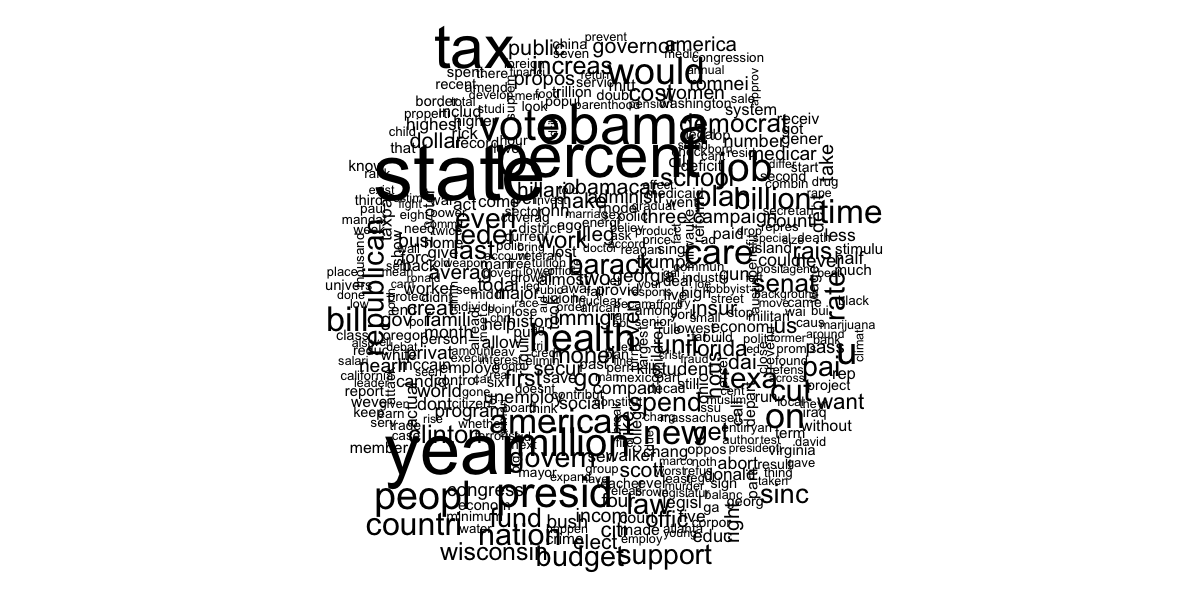

In [193]:
#combine all training tokens and show total number and unique values size
total_train_tokens_multi <- summarize_tokens(train_data_token_norm_multi)
total_train_tokens_unique_multi <- unique(total_train_tokens_multi)

cat("The total number of tokens for the training set is: ", length(total_train_tokens_multi), "\n" )
cat("The total number of unique tokens for the training set is: ", length(total_train_tokens_unique_multi))

#show some graphics
total_train_tokens_multi_df <- as.data.table(total_train_tokens_multi)

#dataframe for wordcloud
plotting_train_tokens_multi <- total_train_tokens_multi_df %>%
  group_by(total_train_tokens_multi) %>% tally() %>% arrange(desc(n)) %>% slice(1:500)

#Show 500 hundred most commong words in the training set multinomial 
wordcloud(words= plotting_train_tokens_multi$total_train_tokens_multi, freq = plotting_train_tokens_multi$n)

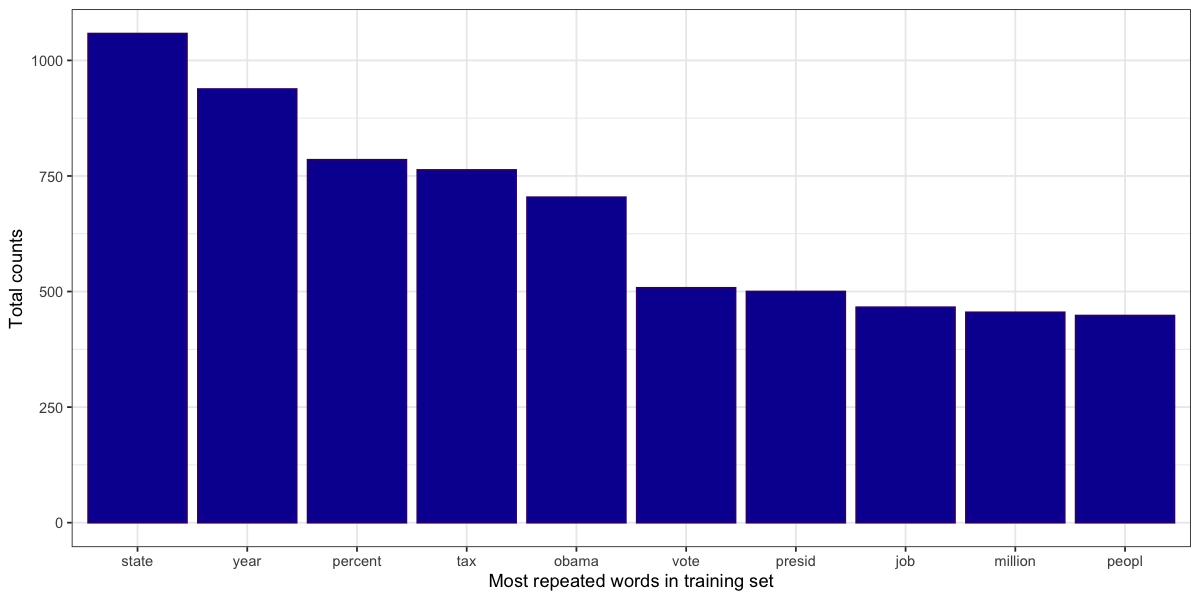

In [195]:
#dataframe for histogram, just take the 10 most common values 
plotting_train_tokens_multi <- total_train_tokens_multi_df %>%
  group_by(total_train_tokens_multi) %>% tally() %>% arrange(desc(n)) %>% slice(1:10) 
options(repr.plot.width=10, repr.plot.height=5)

ggplot(plotting_train_tokens_multi, aes(x= reorder(total_train_tokens_multi, -n), y=n), stat="identity") + 
geom_bar(stat="identity", color='#370e7a',fill='#0b159f') + 
labs(x = "Most repeated words in training set", y = "Total counts") +
theme_bw()

## Model Training

Create likelihood

In [196]:
likelihood_multi<- function(train_data, norm_token, unique_tokens){
    labels <- train_data[,1]
    samples <- length(norm_token)
    col0 <- c(unique_tokens)
    col1 <- c(unique_tokens)
    col2 <- c(unique_tokens)
    col3 <- c(unique_tokens)
    col4 <- c(unique_tokens)
    col5 <- c(unique_tokens)
    


    for (i in 1:samples){
        if (labels[i] == 0){
            col0 <- c(col0, norm_token[[i]] )
        }
        if (labels[i] == 1){
            col1 <- c(col1, norm_token[[i]] )
        }
        if (labels[i] == 2){
            col2 <- c(col2, norm_token[[i]] )
        }
        if (labels[i] == 3){
            col3 <- c(col3, norm_token[[i]] )
        }
        if (labels[i] == 4){
            col4 <- c(col4, norm_token[[i]] )
        }
        if (labels[i] == 5){
            col5 <- c(col5, norm_token[[i]] )
        }

    }

    likelihood_col <- list(col0, col1, col2, col3, col4, col5)
   return(likelihood_col) 
}

In [197]:
#compute likelihood for training sample multinomial
train_likelihood_multi <- likelihood_multi(train_data_multi, train_data_token_norm_multi, total_train_tokens_unique_multi)

#compute number of tokens for each given label
lengths_col <- c(length(train_likelihood_multi[[1]]), length(train_likelihood_multi[[2]]), length(train_likelihood_multi[[3]]),
                    length(train_likelihood_multi[[4]]), length(train_likelihood_multi[[5]]), length(train_likelihood_multi[[6]]))

Count tokens for each label

In [198]:
label_0 <- train_likelihood_multi[[1]]
label_0_df <- data.frame(label_0)
label_0_count <- label_0_df %>% group_by(label_0) %>% 
  summarise(l0=n(), .groups = 'drop') %>% arrange(desc(label_0))

label_1 <- train_likelihood_multi[[2]]
label_1_df <- data.frame(label_1)
label_1_count <- label_1_df %>% group_by(label_1) %>% 
  summarise(l1=n(), .groups = 'drop') %>% arrange(desc(label_1))

label_2 <- train_likelihood_multi[[3]]
label_2_df <- data.frame(label_2)
label_2_count <- label_2_df %>% group_by(label_2) %>% 
  summarise(l2=n(), .groups = 'drop') %>% arrange(desc(label_2))

label_3 <- train_likelihood_multi[[4]]
label_3_df <- data.frame(label_3)
label_3_count <- label_3_df %>% group_by(label_3) %>% 
  summarise(l3=n(), .groups = 'drop') %>% arrange(desc(label_3))

label_4 <- train_likelihood_multi[[5]]
label_4_df <- data.frame(label_4)
label_4_count <- label_4_df %>% group_by(label_4) %>% 
  summarise(l4=n(), .groups = 'drop') %>% arrange(desc(label_4))

label_5 <- train_likelihood_multi[[6]]
label_5_df <- data.frame(label_5)
label_5_count <- label_5_df %>% group_by(label_5) %>% 
  summarise(l5=n(), .groups = 'drop') %>% arrange(desc(label_5))

#combine and create the final data frame for the likelihood given the multinomial training set

likelihood_table <- cbind(label_0_count, l1 = label_1_count$l1 , l2 = label_2_count$l2 , l3 = label_3_count$l3, 
      l4 = label_4_count$l4 , l5 = label_5_count$l5 )
likelihood_table$l0 <- likelihood_table$l0/lengths_col[1]
likelihood_table$l1 <- likelihood_table$l1/lengths_col[2]
likelihood_table$l2 <- likelihood_table$l2/lengths_col[3]
likelihood_table$l3 <- likelihood_table$l3/lengths_col[4]
likelihood_table$l4 <- likelihood_table$l4/lengths_col[5]
likelihood_table$l5 <- likelihood_table$l5/lengths_col[6]

In [199]:
#show table of frequencies for each token given a label
head(likelihood_table)
cat("The total number of tokens is: ",dim(likelihood_table)[1])

,label_0,l0,l1,l2,l3,l4,l5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,zuckerberg,9.644597e-05,4.558093e-05,4.087973e-05,4.465881e-05,1.455392e-04,5.042102e-05
2,zoo,4.822298e-05,4.558093e-05,4.087973e-05,8.931761e-05,7.276961e-05,5.042102e-05
3,zone,9.644597e-05,4.558093e-05,1.635189e-04,4.465881e-05,2.183088e-04,5.042102e-05
4,zombi,4.822298e-05,9.116186e-05,4.087973e-05,4.465881e-05,7.276961e-05,1.008420e-04
5,zippo,9.644597e-05,4.558093e-05,4.087973e-05,4.465881e-05,7.276961e-05,5.042102e-05
6,zip,9.644597e-05,9.116186e-05,4.087973e-05,4.465881e-05,7.276961e-05,1.008420e-04


The total number of tokens is:  7013

Training error

In [200]:
#compute probabilities 
train_predicted_labels_probs_multi <- infere_labels(prior_train_multi, likelihood_table, train_data_token_norm_multi)
#compute labels 
train_predicted_labels_multi <- predicted_labels(train_predicted_labels_probs_multi)
train_real_labels_multi <- train_data_multi[[1]]

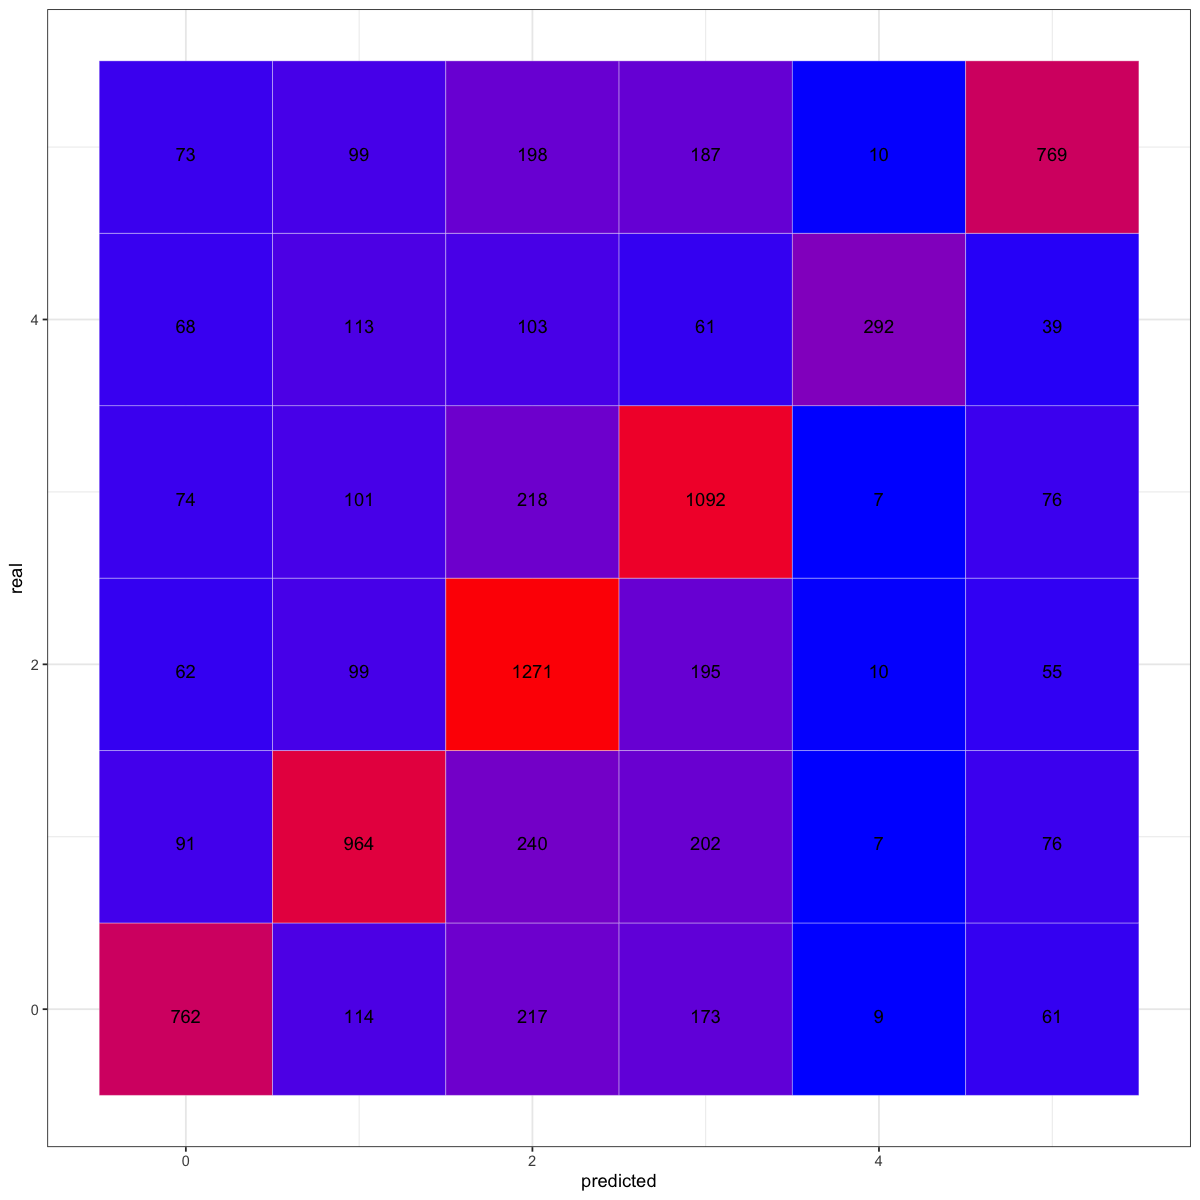

In [201]:
train_labels_multi <- data.frame(predicted = train_predicted_labels_multi, real = train_real_labels_multi)
train_labels_multi <- train_labels_multi %>% group_by(predicted, real) %>% tally()

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data =  train_labels_multi, mapping = aes(x = predicted, y = real)) +
  geom_tile(aes(fill = n), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", n)), vjust = 1) +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw() + theme(legend.position = "none")

In [215]:
train_error_multi <- train_real_labels_multi == train_predicted_labels_multi
accuracy_training_multi <- length(train_error_multi[train_error_multi == TRUE])/length(train_data_multi[[1]])
error_train_multi <- length(train_error_multi[train_error_multi == FALSE])/length(train_data_multi[[1]])
cat("The training accuracy is: ", accuracy_training_multi, '\n')
cat("The training error is: ", error_train_multi)

The training accuracy is:  0.6289692 
The training error is:  0.3710308

## Test Error with Feature selection

Feature selection is the process of selecting a subset of the terms occurring in the training set and using only this subset as features in text classification. Feature selection serves two main purposes. 
First, it makes training and applying a classifier more efficient by decreasing the size of the effective vocabulary. This is of particular importance for classifiers that, unlike NB, are expensive to train. Second, feature selection often increases classification accuracy by eliminating noise features. A noise feature is one that, when added to the document representation, increases the classification error on new data. 

In [203]:
# select 5000 values from the library
tokens_filter_multi <- feature_selector(total_train_tokens_multi, 5000)
filetered_data_token_norm_multi <- filtering_data(train_data_token_norm_multi, tokens_filter_multi)

In [204]:
#Perform tokenization
val_data_token_multi <- data_tokenize(validation_data_multi)

#Remove stopwords
val_data_token_filtered_multi <- remove_stopwords(val_data_token_multi, stopwords)

# erase numbers
val_data_token_filtered_multi <- erase_number(val_data_token_filtered_multi)

#Normalize remaining tokens
val_data_token_norm_multi <- Stem_words(val_data_token_filtered_multi)

The total number of tokens for the validation set is:  20324 
The total number of unique tokens for the validation set is:  3828

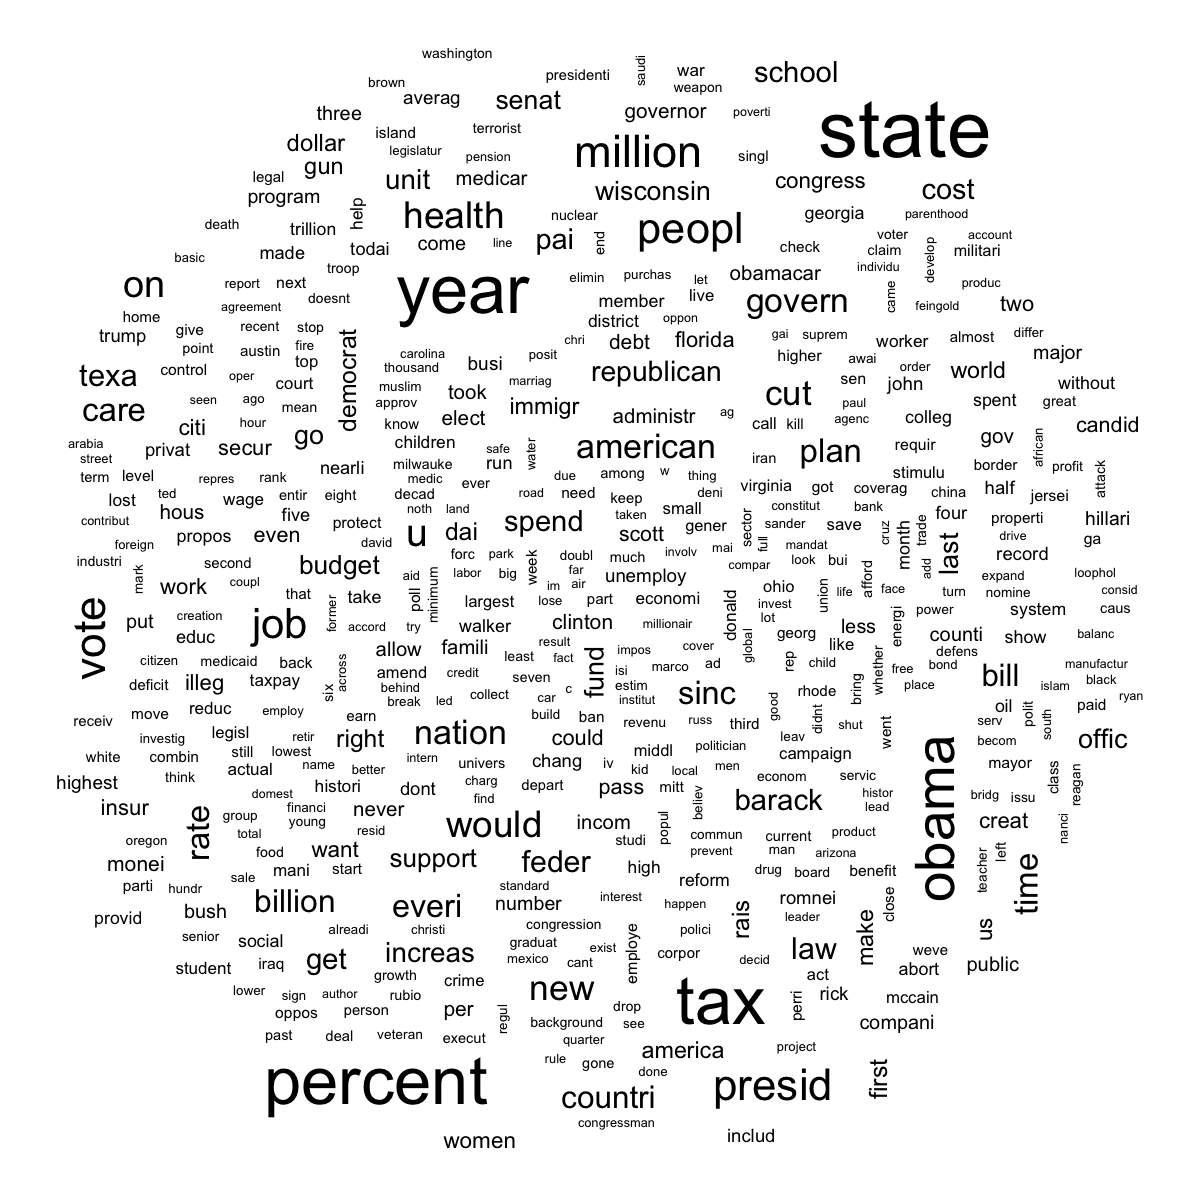

In [205]:
#combine all training tokens and show total number and unique values size
total_val_tokens_multi <- summarize_tokens(val_data_token_norm_multi)
total_val_tokens_unique_multi <- unique(total_val_tokens_multi)

cat("The total number of tokens for the validation set is: ", length(total_val_tokens_multi), "\n" )
cat("The total number of unique tokens for the validation set is: ", length(total_val_tokens_unique_multi))

#show some graphics
total_val_tokens_multi_df <- as.data.table(total_val_tokens_multi)

#dataframe for wordcloud
plotting_val_tokens_multi <- total_val_tokens_multi_df %>%
  group_by(total_val_tokens_multi) %>% tally() %>% arrange(desc(n)) %>% slice(1:500)

#Show 500 hundred most commong words in the training set multinomial 
wordcloud(words= plotting_val_tokens_multi$total_val_tokens_multi, freq = plotting_val_tokens_multi$n)


In [206]:
#compute likelihood 
likelihood_multinomial_fs <- likelihood_multi(train_data_multi, filetered_data_token_norm_multi, total_val_tokens_unique_multi)

#compute number of tokens for each given label
lengths_col <- c(length(likelihood_multinomial_fs[[1]]), length(likelihood_multinomial_fs[[2]]), length(likelihood_multinomial_fs[[3]]),
                    length(likelihood_multinomial_fs[[4]]), length(likelihood_multinomial_fs[[5]]), length(likelihood_multinomial_fs[[6]]))

In [207]:
label_0 <- likelihood_multinomial_fs[[1]]
label_0_df <- data.frame(label_0)
label_0_count <- label_0_df %>% group_by(label_0) %>% 
  summarise(l0=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_multinomial_fs[[2]]
label_1_df <- data.frame(label_0)
label_1_count <- label_1_df %>% group_by(label_0) %>% 
  summarise(l1=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_multinomial_fs[[3]]
label_2_df <- data.frame(label_0)
label_2_count <- label_2_df %>% group_by(label_0) %>% 
  summarise(l2=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_multinomial_fs[[4]]
label_3_df <- data.frame(label_0)
label_3_count <- label_3_df %>% group_by(label_0) %>% 
  summarise(l3=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_multinomial_fs[[5]]
label_4_df <- data.frame(label_0)
label_4_count <- label_4_df %>% group_by(label_0) %>% 
  summarise(l4=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_multinomial_fs[[6]]
label_5_df <- data.frame(label_0)
label_5_count <- label_5_df %>% group_by(label_0) %>% 
  summarise(l5=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

In [208]:
likelihood_table_fs <- merge(x=label_0_count, y=label_1_count, by="label_0")
likelihood_table_fs <- merge(x=likelihood_table_fs, y=label_2_count, by="label_0")
likelihood_table_fs <- merge(x=likelihood_table_fs, y=label_3_count, by="label_0")
likelihood_table_fs <- merge(x=likelihood_table_fs, y=label_4_count, by="label_0")
likelihood_table_fs <- merge(x=likelihood_table_fs, y=label_5_count, by="label_0")

In [209]:
#combine and create the final data frame for the likelihood given the multinomial training set
likelihood_table_fs$l0 <- likelihood_table_fs$l0/lengths_col[1]
likelihood_table_fs$l1 <- likelihood_table_fs$l1/lengths_col[2]
likelihood_table_fs$l2 <- likelihood_table_fs$l2/lengths_col[3]
likelihood_table_fs$l3 <- likelihood_table_fs$l3/lengths_col[4]
likelihood_table_fs$l4 <- likelihood_table_fs$l4/lengths_col[5]
likelihood_table_fs$l5 <- likelihood_table_fs$l5/lengths_col[6]

In [210]:
#show table of frequencies for each token given a label
head(likelihood_table_fs)

,label_0,l0,l1,l2,l3,l4,l5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,aa,5.848979e-05,5.480053e-05,4.820671e-05,0.0000533049,9.723843e-05,6.157256e-05
2,aaa,1.169796e-04,5.480053e-05,4.820671e-05,0.0000533049,9.723843e-05,1.231451e-04
3,abbott,2.339592e-04,1.644016e-04,1.928268e-04,0.0002132196,1.944769e-04,6.157256e-05
4,abid,1.169796e-04,5.480053e-05,4.820671e-05,0.0000533049,9.723843e-05,1.231451e-04
5,abil,2.924490e-04,2.740026e-04,1.446201e-04,0.0002132196,9.723843e-05,6.157256e-05
6,abl,3.509388e-04,6.028058e-04,2.410336e-04,0.0005863539,2.917153e-04,3.078628e-04


In [211]:
#compute probabilities 
predicted_labels_probs_multi_fs <- infere_labels(prior_train_multi, likelihood_table_fs, val_data_token_norm_multi)
#compute labels 
predicted_labels_multi_fs <- predicted_labels(predicted_labels_probs_multi_fs)
real_labels_multi <- validation_data_multi[[1]]

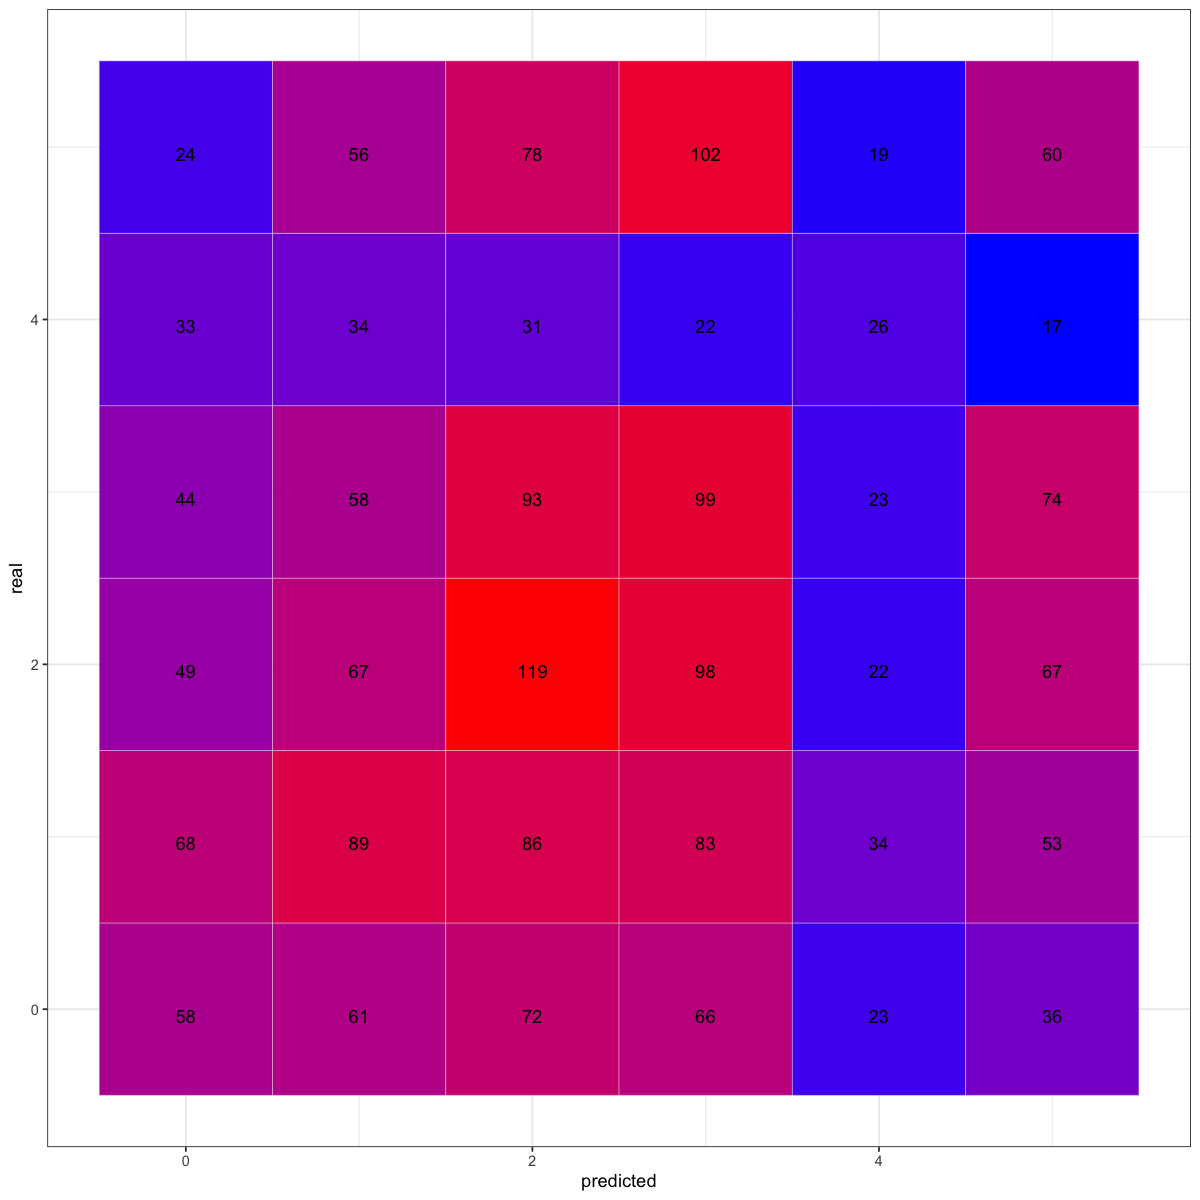

In [212]:
labels_multi_fs <- data.frame(predicted = predicted_labels_multi_fs, real = real_labels_multi)
labels_multi_fs <- labels_multi_fs %>% group_by(predicted, real) %>% tally()

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data = labels_multi_fs, mapping = aes(x = predicted, y = real)) +
  geom_tile(aes(fill = n), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", n)), vjust = 1) +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw() + theme(legend.position = "none")

In [216]:
multi_error_fs <- real_labels_multi == predicted_labels_multi_fs
accuracy_multi_fs <- length(multi_error_fs[multi_error_fs == TRUE])/length(validation_data_multi[[1]])
error_multi_fs <- length(multi_error_fs[multi_error_fs == FALSE])/length(validation_data_multi[[1]])
cat("The validation accuracy is: ", accuracy_multi_fs, "\n")
cat("The validation error is: ", error_multi_fs)

The validation accuracy is:  0.2206458 
The validation error is:  0.7793542

# SECTION B: Two Classes NB Classification

## Data Pre-processing

In [98]:
#drop unnecesary columns
train_data_bi_raw$id <- NULL
train_data_bi_raw$title <- NULL
train_data_bi_raw$author <- NULL

In [99]:
# Perform tokenization
all_token_bi <- data_tokenize(train_data_bi_raw)

# Remove stopwords and numbers
all_token_bi_clean_words <- remove_stopwords(all_token_bi, stopwords)
all_token_bi_clean_number <- erase_number(all_token_bi_clean_words)

# Normalize tokens
all_token_bi_norm <- Stem_words(all_token_bi_clean_number)

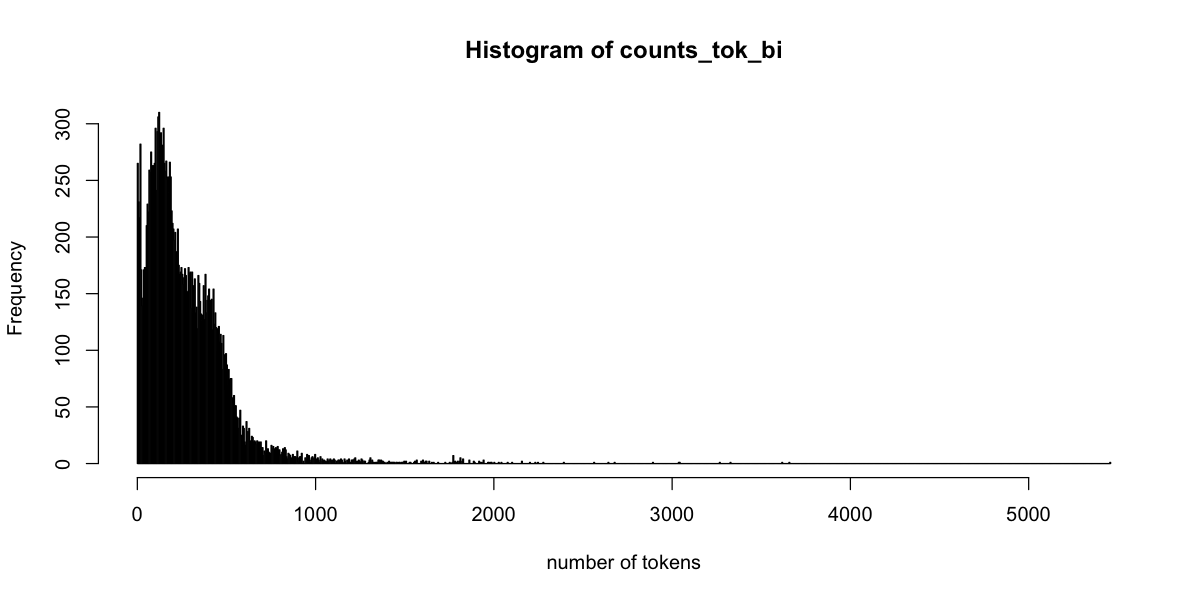

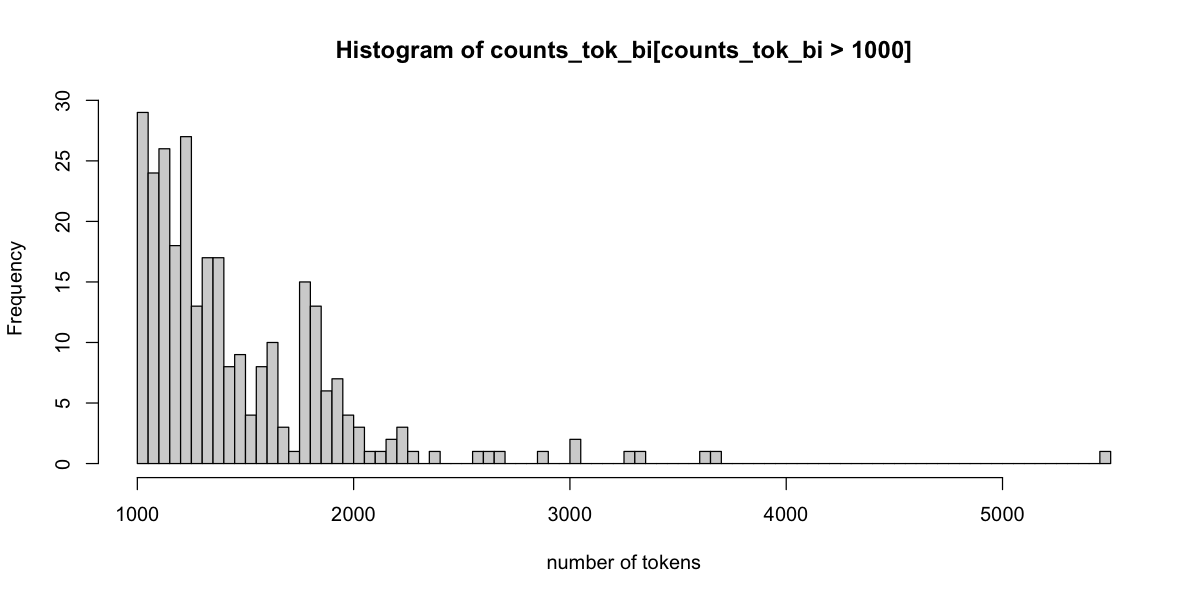

In [100]:
#Count total number of tokens in all samples
counts_tok_bi <- c()
tot <- length(all_token_bi_norm)
for (i in 1:tot){
    counts_tok_bi <- c(counts_tok_bi, length(all_token_bi_norm[[i]]))
}

#show histogram
options(repr.plot.width=10, repr.plot.height=5)

#show histogram
hist(counts_tok_bi, breaks = 1000, xlab ="number of tokens")

#see text with more than 1000 tokens
hist(counts_tok_bi[counts_tok_bi >1000], breaks = 100, xlab ="number of tokens")
#remove samples with more than 1000 tokens 
samples_to_be_removed_bi <- which(counts_tok_bi > 1000)

In [101]:
# remove samples with more than 1000 tokens 
raw_data_bi_filtered <- train_data_bi_raw[-samples_to_be_removed_bi,]
raw_data_bi_filtered  <- as.data.frame(raw_data_bi_filtered)

In [102]:
# Data splitting
index <- createDataPartition(raw_data_bi_filtered$label, p=p_train, list=FALSE) # for training set
train_data_bi <- raw_data_bi_filtered[index, ]
validation_data_bi <- raw_data_bi_filtered[-index, ]

__Prepare training set__

In [103]:
#show trainig set structure
cat("Training set structure")
train_data_bi[1,]

#show size 
size_t <- dim(train_data_bi)
cat("The total number of rows is: ", size_t[1], " and the total number of colums is: ", size_tm[2], "\n")

#compute prior of the training set (probability that a text has label 0 to 5)

prior_train_bi <- train_data_bi %>% group_by(label) %>% 
  summarise(prior=n(),
            .groups = 'drop') %>% arrange(label)

prior_train_bi$prior <- prior_train_bi$prior/length(train_data_bi[,1])
cat("Training set priors")
prior_train_bi

Training set structure

Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

The total number of rows is:  16415  and the total number of colums is:  3 
Training set priors

label,prior
<int>,<dbl>
0,0.5014316
1,0.4985684


In [104]:
#Perform tokenization
train_data_token_bi <- data_tokenize(train_data_bi)
train_data_token_bi <- english_checker(train_data_token_bi)

#Remove stopwords
train_data_token_filtered_bi <- remove_stopwords(train_data_token_bi, stopwords)

# erase numbers
train_data_token_filtered_bi <- erase_number(train_data_token_filtered_bi)

#Normalize remaining tokens
train_data_token_norm_bi <- Stem_words(train_data_token_filtered_bi)
train_data_token_norm_bi <- reducer(train_data_token_norm_bi, 100)

cat("Here is an example of the process","\n")
cat("Sample text: ")
train_data_bi[4,]
cat("Tokenized text: ", train_data_token_bi[[4]], "\n")
cat("Filtered tokens: ", train_data_token_filtered_bi[[4]], "\n")
cat("Stemmed tokens: ", train_data_token_norm_bi[[4]], "\n")

Here is an example of the process 
Sample text: 

,Text,label
,<chr>,<int>
5,"Print An Iranian woman has been sentenced to six years in prison after Iran’s Revolutionary Guard searched her home and found a notebook that contained a fictional story she’d written about a woman who was stoned to death, according to the Eurasia Review . Golrokh Ebrahimi Iraee, 35, is the wife of political prisoner Arash Sadeghi, 36, who is serving a 19-year prison sentence for being a human rights activist, the publication reported. “When the intelligence unit of the Revolutionary Guards came to arrest her husband, they raided their apartment – without a warrant – and found drafts of stories that Ebrahimi Iraee had written,” the article stated. “One of the confiscated drafts was a story about stoning women to death for adultery – never published, never presented to anyone,” the article stated. “The narrative followed the story of a protagonist that watched a movie about stoning of women under Islamic law for adultery.",1


Tokenized text:  print an iranian woman has been sentenced to six years in prison after iran s revolutionary guard searched her home and found a notebook that contained a fictional story she d written about a woman who was stoned to death according to the review is the wife of political prisoner who is serving a year prison sentence for being a human rights activist the publication reported when the intelligence unit of the revolutionary guards came to arrest her husband they raided their apartment without a warrant and found drafts of stories that had written the article stated one of the confiscated drafts was a story about stoning women to death for adultery never published never presented to anyone the article stated the narrative followed the story of a protagonist that watched a movie about stoning of women under islamic law for adultery 
Filtered tokens:  print iranian woman sentenced six years prison iran revolutionary guard searched home found notebook contained fictional stor

Show constructed library

The total number of tokens for the training set is:  1737964 
The total number of unique tokens for the training set is:  18859

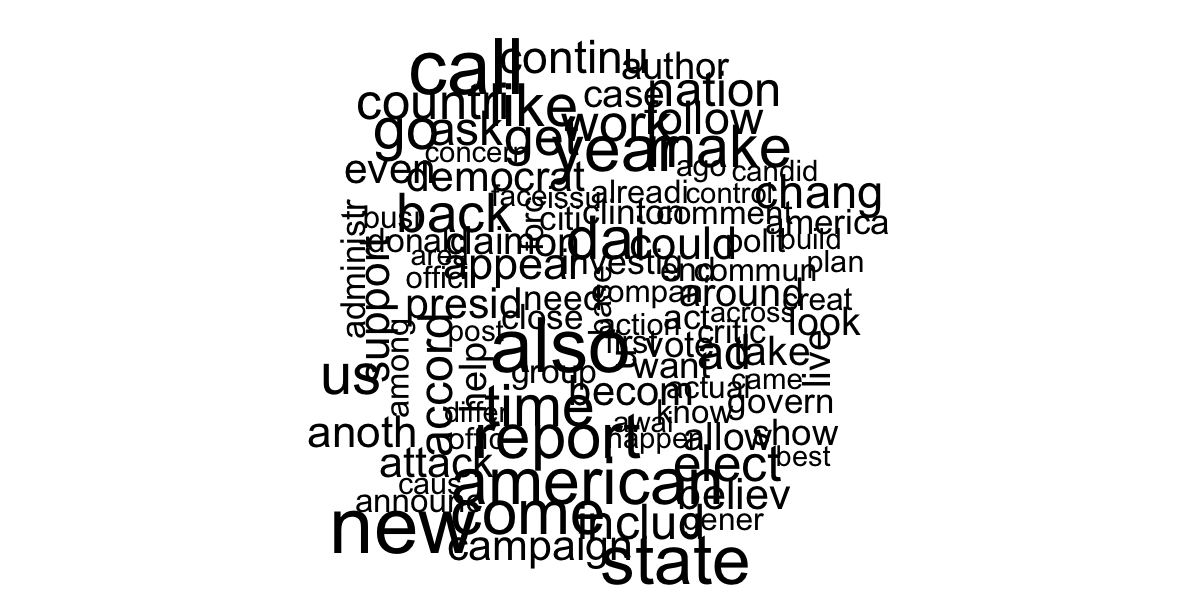

In [105]:
#combine all training tokens and show total number and unique values size
total_train_tokens_bi <- summarize_tokens(train_data_token_norm_bi)
total_train_tokens_unique_bi <- unique(total_train_tokens_bi)

cat("The total number of tokens for the training set is: ", length(total_train_tokens_bi), "\n" )
cat("The total number of unique tokens for the training set is: ", length(total_train_tokens_unique_bi))

#show some graphics
total_train_tokens_bi_df <- as.data.table(total_train_tokens_bi)

#dataframe for wordcloud
plotting_train_tokens_bi <- total_train_tokens_bi_df %>%
  group_by(total_train_tokens_bi) %>% tally() %>% arrange(desc(n)) %>% slice(1:100)

#Show 100 hundred most commong words in the training set multinomial 
wordcloud(words= plotting_train_tokens_bi$total_train_tokens_bi, freq = plotting_train_tokens_bi$n)

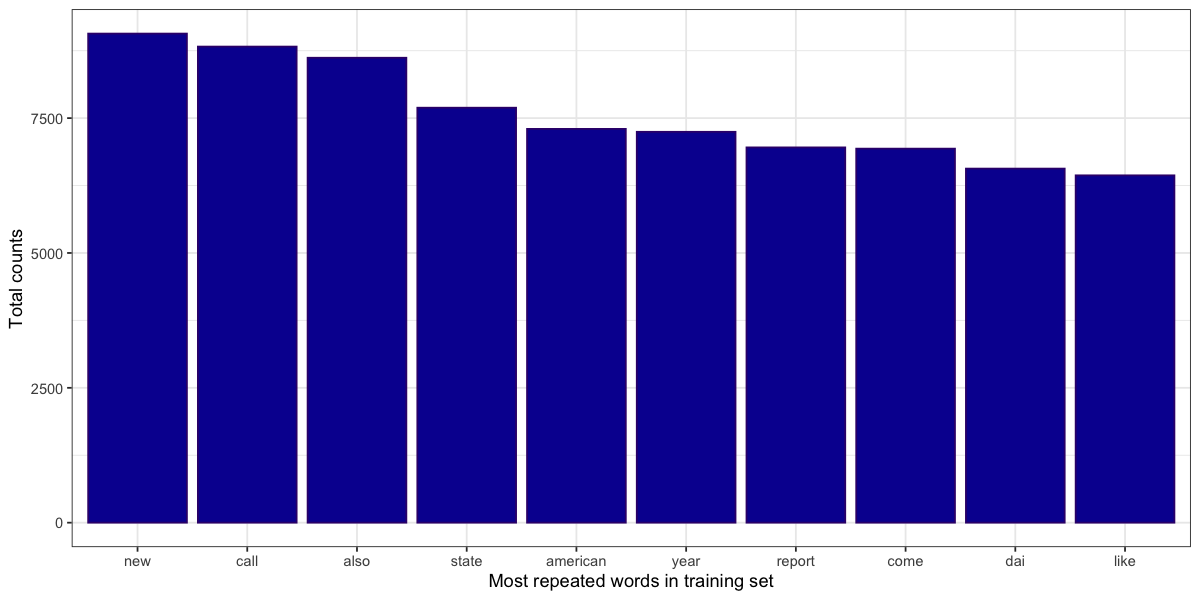

In [106]:
#dataframe for histogram, just take the 10 most common values 
plotting_train_tokens_bi <- total_train_tokens_bi_df %>%
  group_by(total_train_tokens_bi) %>% tally() %>% arrange(desc(n)) %>% slice(1:10) 
options(repr.plot.width=10, repr.plot.height=5)

ggplot(plotting_train_tokens_bi, aes(x= reorder(total_train_tokens_bi, -n), y=n), stat="identity") + 
geom_bar(stat="identity", color='#370e7a',fill='#0b159f') + 
labs(x = "Most repeated words in training set", y = "Total counts") +
theme_bw()

## Model Training

In [107]:
# create likelihood
likelihood_bi<- function(base_data, norm_data, tokens){
    #This function adds the tokens from the training data given the label
    #Then it adds one time the library to each list for avoiding 0 probabilities
    labels <- base_data[,2]
    samples <- length(norm_data)
    col0 <- c(tokens)
    col1 <- c(tokens)


    for (i in 1:samples){
        if (labels[i] == "0"){
            col0 <- c(col0, norm_data[[i]] )
        }
        if (labels[i] == "1"){
            col1 <- c(col1, norm_data[[i]] )
    }

    likelihood_col <- list(col0, col1)

}
   return(likelihood_col) 
}

In [108]:
#compute likelihood for training sample multinomial
likelihood_train_bi <- likelihood_bi(train_data_bi, train_data_token_norm_bi, total_train_tokens_unique_bi)

#compute number of tokens for each given label
lengths_col <- c(length(likelihood_train_bi[[1]]), length(likelihood_train_bi[[2]]))

In [110]:
# Count tokens for each label
label_0 <- likelihood_train_bi[[1]]
label_0_df <- data.frame(label_0)
label_0_count <- label_0_df %>% group_by(label_0) %>% 
  summarise(l0=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_1 <- likelihood_train_bi[[2]]
label_1_df <- data.frame(label_1)
label_1_count <- label_1_df %>% group_by(label_1) %>% 
  summarise(l1=n(),
            .groups = 'drop') %>% arrange(desc(label_1))

#combine and create the final data frame for the likelihood given the multinomial training set
likelihood_table_bi <- cbind(label_0_count, l1 = label_1_count$l1)
likelihood_table_bi$l0 <- likelihood_table_bi$l0/lengths_col[1]
likelihood_table_bi$l1 <- likelihood_table_bi$l1/lengths_col[2]

In [112]:
infere_labels_bi <- function(prior, likelihood, dataset){
    prior_prob <- prior[[2]]
    samples_number <- length(dataset)
    labels_size <- length(prior_prob)
    labels_inferred <- matrix(nrow = samples_number, ncol = length(prior_prob), 0)
    
    for (i in 1:samples_number){
        #convert token in dataset into dataframe
        df_dataset <- data.frame(label_0 = dataset[[i]])
        #inner join with likelihood to take only the words matched
        prob_comb <- merge(x=df_dataset, y=likelihood, by="label_0")
        #erase column with labels
        prob_comb$label_0 <- NULL
        #multiply all rows given in the same column (likelihood)
        probs <- apply( prob_comb, 2, prod)
        #multiply result with prior
        probs_post <- probs*prior_prob
        evidence <- sum(probs_post)
        posterior <- probs_post/evidence
        labels_inferred[i,] <- posterior
    }
    return(labels_inferred)
}

In [113]:
#compute probabilities 
predicted_labels_train_probs_bi <- infere_labels_bi(prior_train_bi, likelihood_table_bi, train_data_token_norm_bi)
no_na <- predicted_labels_train_probs_bi[!is.nan(predicted_labels_train_probs_bi[,1]),]
predicted_labels_trainset_bi <- predicted_labels(no_na)
real_labels_trainset_bi <- train_data_bi[[2]]
real_labels_trainset_bi <- real_labels_trainset_bi[!is.nan(predicted_labels_train_probs_bi[,1])]

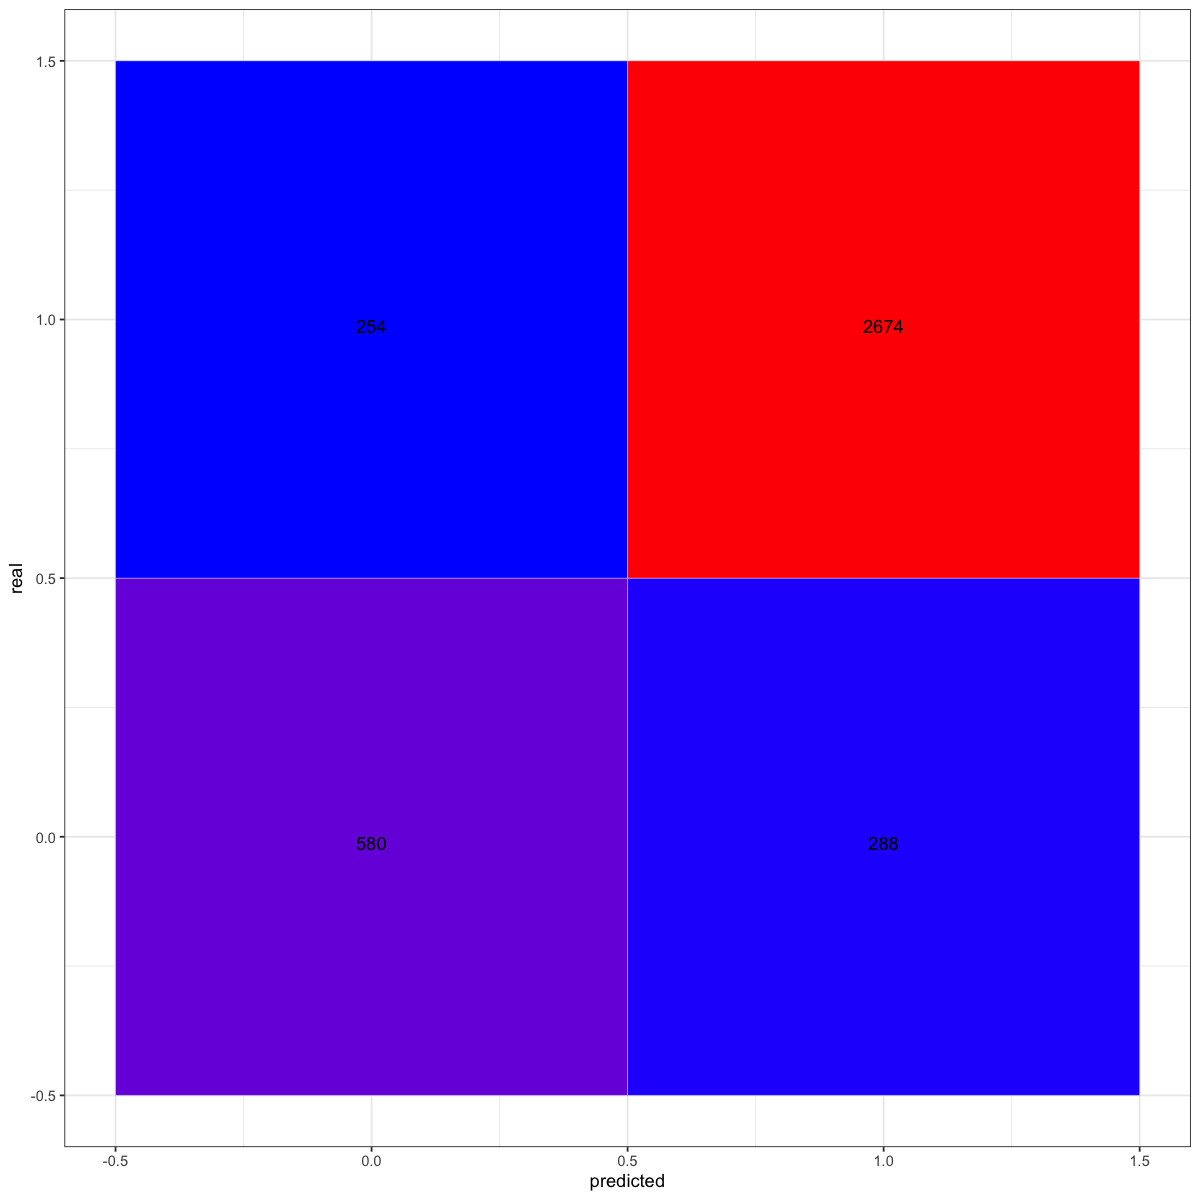

In [217]:
trainset_labels <- data.frame(predicted = predicted_labels_trainset_bi, real = real_labels_trainset_bi)
trainset_labels <- trainset_labels %>% group_by(predicted, real) %>% tally()

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data =  trainset_labels, mapping = aes(x = predicted, y = real)) +
  geom_tile(aes(fill = n), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", n)), vjust = 1) +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw() + theme(legend.position = "none")

In [219]:
train_error_bi <- real_labels_trainset_bi == predicted_labels_trainset_bi
accuracy_train_bi <- length(train_error_bi[train_error_bi == TRUE])/length(real_labels_trainset_bi)
error_training_bi <- length(train_error_bi[train_error_bi == FALSE])/length(real_labels_trainset_bi)
cat("The training accuracy is: ", accuracy_train_bi, "\n")
cat("The training error is: ", error_training_bi)

The training accuracy is:  0.8572181 
The training error is:  0.1427819

## Test Error

In [118]:
#Perform tokenization
val_data_token_bi <- data_tokenize(validation_data_bi)
val_data_token_bi <- english_checker(val_data_token_bi)

#Remove stopwords
val_data_token_filtered_bi <- remove_stopwords(val_data_token_bi, stopwords)

# erase numbers
val_data_token_filtered_bi <- erase_number(val_data_token_filtered_bi)

#Normalize remaining tokens
val_data_token_norm_bi <- Stem_words(val_data_token_filtered_bi)
val_data_token_norm_bi <- reducer(val_data_token_norm_bi, 100)

The total number of tokens for the validation set is:  430174 
The total number of unique tokens for the validation set is:  13207

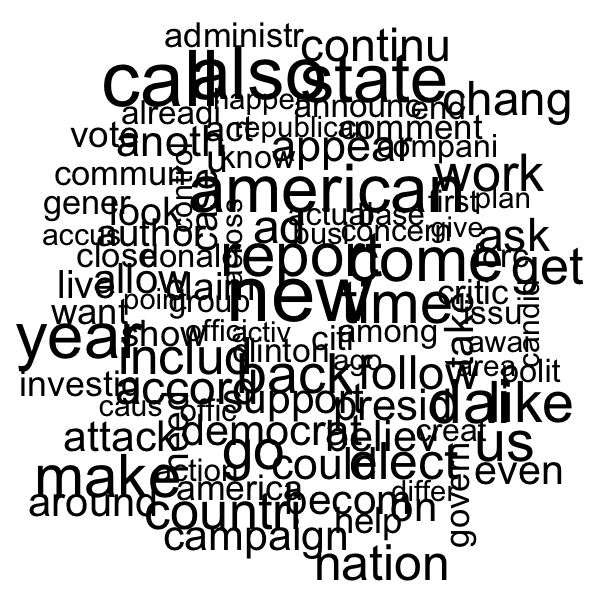

In [119]:
#combine all training tokens and show total number and unique values size
total_val_tokens_bi <- summarize_tokens(val_data_token_norm_bi)
total_val_tokens_unique_bi <- unique(total_val_tokens_bi)

cat("The total number of tokens for the validation set is: ", length(total_val_tokens_bi), "\n" )
cat("The total number of unique tokens for the validation set is: ", length(total_val_tokens_unique_bi))

#show some graphics
total_val_tokens_df <- as.data.table(total_val_tokens_bi)

#dataframe for wordcloud
plotting_val_tokens<- total_val_tokens_df %>%
  group_by(total_val_tokens_bi) %>% tally() %>% arrange(desc(n)) %>% slice(1:100)

#Show 500 hundred most commong words in the training set multinomial 
wordcloud(words= plotting_val_tokens$total_val_tokens_bi, freq = plotting_val_tokens$n)

In [120]:
#compute likelihood for training sample multinomial
likelihood_val <- likelihood_bi(train_data_bi, train_data_token_norm_bi, c(total_train_tokens_unique_bi, total_val_tokens_unique_bi))

#compute number of tokens for each given label
lengths_col <- c(length(likelihood_val[[1]]), length(likelihood_val[[2]]))

In [121]:
label_0 <- likelihood_val[[1]]
label_0_df <- data.frame(label_0)
label_0_count <- label_0_df %>% group_by(label_0) %>% 
  summarise(l0=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

label_0 <- likelihood_val[[2]]
label_1_df <- data.frame(label_0)
label_1_count <- label_1_df %>% group_by(label_0) %>% 
  summarise(l1=n(),
            .groups = 'drop') %>% arrange(desc(label_0))

likelihood_table_val <- merge(x=label_0_count, y=label_1_count, by="label_0")

In [122]:
#compute probabilities 
predicted_labels_val_probs_bi <- infere_labels_bi(prior_train_bi, likelihood_table_val, val_data_token_norm_bi)
no_na <- predicted_labels_val_probs_bi[!is.nan(predicted_labels_val_probs_bi[,1]),]

In [123]:
predicted_labels_valset_bi <- predicted_labels(no_na)
real_labels_valset_bi <- validation_data_bi[[2]]
real_labels_valset_bi <- real_labels_valset_bi[!is.nan(predicted_labels_val_probs_bi[,1])]

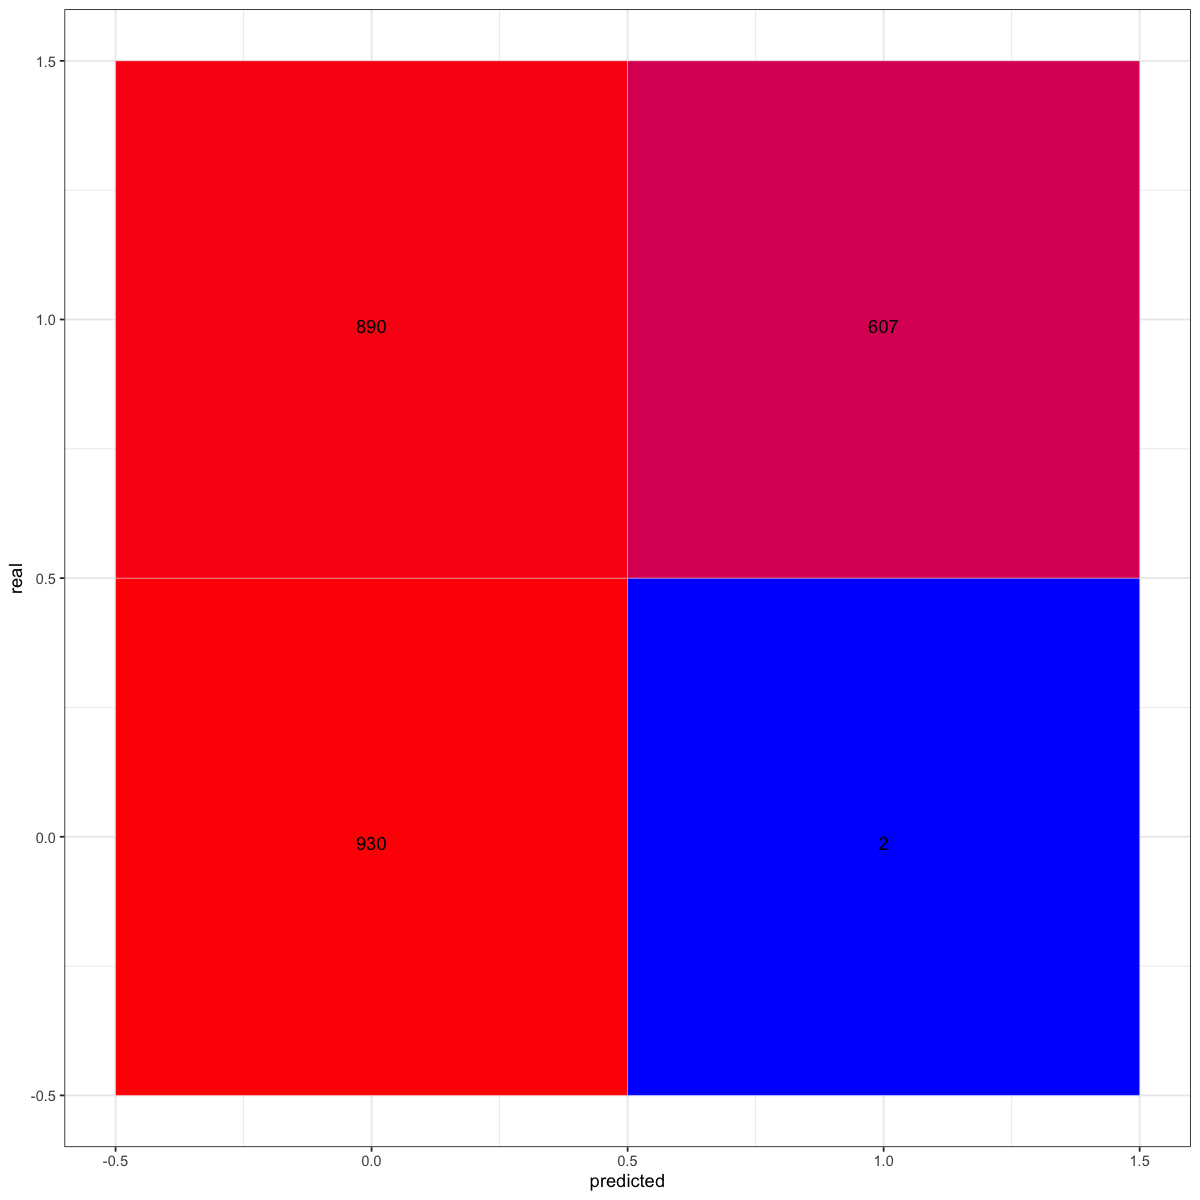

In [220]:
valset_labels <- data.frame(predicted = predicted_labels_valset_bi, real = real_labels_valset_bi)
valset_labels <- valset_labels %>% group_by(predicted, real) %>% tally()

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data =  valset_labels, mapping = aes(x = predicted, y = real)) +
  geom_tile(aes(fill = n), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", n)), vjust = 1) +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw() + theme(legend.position = "none")

In [222]:
validation_error <- real_labels_valset_bi == predicted_labels_valset_bi
accuracy_validation <- length(validation_error[validation_error == TRUE])/length(validation_data_bi[[1]])
error_validation <- length(validation_error[validation_error == FALSE])/length(validation_data_bi[[1]])
cat("The validation accuracy is: ", 1-error_validation, "\n")
cat("The validation error is: ", error_validation)

The validation accuracy is:  0.7825981 
The validation error is:  0.2174019

# CONCLUSION

The naive bayes successed in the binary classification and failed in the multiclass dataset:<br>

error of muliclass dataset = 0.78<br>
error of binary dataset = 0.22<br>
The main advantages and disadvantages of this algorithm are:<br>

__Advantages__<br>
it is easy to implement <br>
it is highly scalable and can easily handle large datasets with Feature Selection<br>

__Disadvantages__<br>
it is highly dependent on the characteristics of the dataset (complexity)<br>
it does not consider the correlations between the words in the same sentence<br>